![image](https://user-images.githubusercontent.com/87592790/201239583-3b6be316-587a-458c-ba94-3ec30d234030.png)

In [2]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize
import pandas as pd 
from tqdm import tqdm
from konlpy.tag import Okt


In [3]:
data = pd.read_excel('블로그_비건(전처리)_수업용.xlsx')
data.head(5)

,time,review,comment,like,url,doc
0,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737,생활 나의 결혼식 답례품 후기 및 추천 꾸디 프리미엄 비건 쿠키 디저트 이안 복사...
1,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869,일지 일차 맛있으면 안되는데 키메랩 복사 이웃추가 본문 기타 기능 공유하기 생각보...
2,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 나우티퍼피 복사 이웃추가 본문 기...
3,2022. 2. 14. 10:00,"맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식, ...",[],2,https://blog.naver.com/mom_say/222646546514,맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식 포만감과 비타민 가 풍부하여 ...
4,2021. 9. 20. 17:56,"﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit...",[],5,https://blog.naver.com/givingtreems/222511615680,베지터블 토마토스튜 새송이버섯 양파 주키니 당근 샐러리 등 다섯가지 채소를 올리브...


### 원하는 태그 추출 & 불용어 제거

In [4]:
okt = Okt()

 # 한국어 불용어 사전 불러오기
 # 의미가 없거나 없어도 되는 단어를 모아놓은 파일
stopwords = pd.read_csv('ko-stopwords_형태소분석_수업용.csv'); print(stopwords[0:3])  
# 리스트로 만들어줌
stopwords = list(stopwords['stopwords']); print(stopwords[0:3])
# 크롤링한 내용을 보면서 불용어를 추가로 넣어줌(extend)
stopwords.extend(['에서','고','이다','는','한','씨', "것","거","게","데","이다","건","고","되다","되어다","걸","기",
                  "시","네","듯","랍니","중이","얘","스","도도", "나","수","개","내","기","제","저","인","있다","이렇다",
                  "그렇다","번","위","팅","분","인","링","란","포","두", "진짜", "하다" ,"이다" ,"가다", "이제" ,"들다"
                 ]) 
# 혹시 중복이 되어 있을 수 있어 중복제거 해줌
stopwords = set(stopwords) 

# 형태소 분석 Function
def okt_pos_tagging(string):
    # pos는 주어진 텍스트를 형태소 단위로 나누고 품사를 태깅한다.(형태소, 품사)
    # 예: [('유일하', 'Noun'), ('게', 'Josa'), ('되다', 'Verb')]
    pos_words = okt.pos(string, stem= True, norm = True) 
    words = [word for word, tag in pos_words if tag
             in ['Noun', 'Adjective', 'Verb', ' Adverb'] if word not in stopwords]
    return words    
    
 

  stopwords
0         가
1      가까스로
2        가령
['가', '가까스로', '가령']


In [5]:
# 형태소 분석 적용
tokenizing_doc = []
for i in tqdm(data['doc']):
    tokenizing_doc.append(okt_pos_tagging(i))
data['token'] = tokenizing_doc #새로운 tokenizing이라는 컬럼에 키워드 형태로 만든 원리


100%|██████████| 961/961 [01:18<00:00, 12.25it/s]


In [6]:
data['token']

0      [생활, 결혼식, 답례, 품, 후기, 추천, 꾸다, 프리미엄, 비건, 쿠키, 디저트...
1      [일지, 일차, 맛있다, 안되다, 키메, 랩, 복사, 이웃, 추가, 본문, 기능, ...
2      [맛집, 멋지다, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, ...
3      [맘, 메이크, 선, 바쁘다, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민,...
4      [베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 새다, 리, 가지, 채소...
                             ...                        
956    [일상, 다이어트, 식단, 기록, 일차, 리, 복사, 이웃, 추가, 본문, 기능, ...
957    [업계, 트, 랜드, 분석, 금, 뉴스, 크다, 리핑, 푸드, 앤, 로그, 복사, ...
958    [계란, 뭐, 널다, 병아리, 콩, 스낵, 비건, 푸드, 힘차다, 가족, 복사, 이...
959    [카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...
960    [다이어트, 채다, 린지, 주, 복사, 이웃, 추가, 본문, 기능, 공유, 어느덧다...
Name: token, Length: 961, dtype: object

![image](https://user-images.githubusercontent.com/87592790/201246816-c566b865-63ea-4ded-92ec-5a0abf343cb5.png)

In [7]:
# 명사 추출
text_noun = [okt.nouns(doc) for doc in data.doc]
data['text_noun'] = text_noun
data['text_noun'] = data.text_noun.apply(lambda x: [a for a in x if a not in stopwords])


In [8]:
data.head(3)

,time,review,comment,like,url,doc,token,text_noun
0,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737,생활 나의 결혼식 답례품 후기 및 추천 꾸디 프리미엄 비건 쿠키 디저트 이안 복사...,"[생활, 결혼식, 답례, 품, 후기, 추천, 꾸다, 프리미엄, 비건, 쿠키, 디저트...","[생활, 결혼식, 답례, 품, 후기, 추천, 프리미엄, 비건, 쿠키, 디저트, 이안..."
1,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869,일지 일차 맛있으면 안되는데 키메랩 복사 이웃추가 본문 기타 기능 공유하기 생각보...,"[일지, 일차, 맛있다, 안되다, 키메, 랩, 복사, 이웃, 추가, 본문, 기능, ...","[일지, 일차, 키메, 랩, 복사, 이웃, 추가, 본문, 기능, 공유, 생각, 비건..."
2,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 나우티퍼피 복사 이웃추가 본문 기...,"[맛집, 멋지다, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, ...","[맛집, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, 퍼피, 복..."


#### WordCloud

In [9]:
# 리스트 차원을 낮춰서 함수 생성
def flatten(a):
    flatlist = []
    for elem in a:
        if type(elem)==list:
            for e in elem:
                flatlist.append(e)
        else:
            flatlist.append(elem)
    return flatlist


In [10]:
from wordcloud import WordCloud

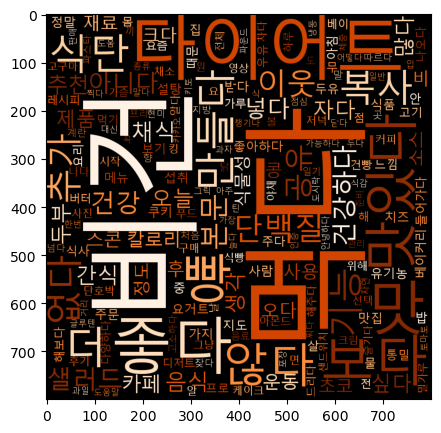

In [11]:
data1 = data.token.tolist() #시리즈에서 리스트로
data2 = flatten(data1)
text = nltk.Text(data2)

# 명사, 동사, 형용사, 부사로 워드클라우드
import matplotlib.pyplot as plt

font_path = 'C/Windows/Fonts/malgun.ttf' #본인 폰트 경로

wordclouds = WordCloud(width=800,
                        height=800,
                        background_color='Black',
                        colormap='Oranges',
                        font_path=font_path)

from collections import Counter 
count = Counter(text) 
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(5,5)) 
plt.imshow(wordclouds.to_array())
plt.show()


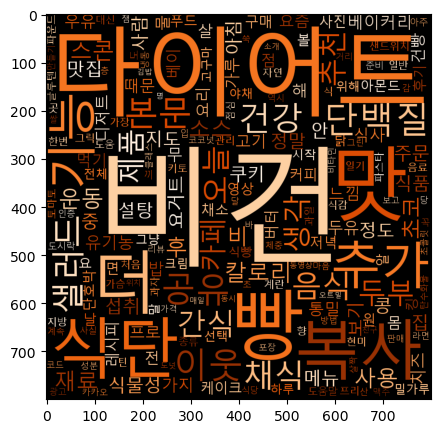

In [12]:
df_noun = data['text_noun'].tolist()
df_noun2 = flatten(df_noun)
text2 = nltk.Text(df_noun2)

# 명사, 동사, 형용사, 부사로 워드클라우드
import matplotlib.pyplot as plt

font_path = 'C/Windows/Fonts/malgun.ttf' #본인 폰트 경로

wordclouds = WordCloud(width=800,
                        height=800,
                        background_color='Black',
                        colormap='Oranges',
                        font_path=font_path)

from collections import Counter 
count = Counter(text2) 
wordclouds = wordclouds.generate_from_frequencies(count)

fig = plt.figure(figsize=(5,5)) 
plt.imshow(wordclouds.to_array())
plt.show()


#### TF-IDF

In [13]:
data3 = []
for i in data1:
    string = i[0]  
    for w in i[1:]:  #첫번째 이후 단어부터 토큰으로 이어 붙여줌
        string += " "  #단어 사이는 띄어쓰기로 연결
        string += w  #띄어쓰기 이후 다음 단어 써주기 반법
    data3.append(string)
data3[0]


'생활 결혼식 답례 품 후기 추천 꾸다 프리미엄 비건 쿠키 디저트 이안 복사 이웃 추가 본문 기능 지도 보기 전체 도지 닫다 공유 위치 꾸다 결혼식 답례 품 후기 추천 꾸다 프리미엄 비건 디저트 결혼식 준비 고민 많다 답례 품다 고민 많다 축하 마음 전달 해주다 께나 정성 답례 품 드리다 싶다 때문 기존 받다 보다 답례 품 떡 소금 수건 흔하다 남 특별하다 고급 진걸 선물 싶다 고민 꾸다 네이버 쇼핑 스마트 스토어 디저트 꾸준하다 프리미엄 비건 디저트 결론 꾸다 프리미엄 비건 디저트 결혼식 답례 품 선택 꾸다 비건 쿠키 선물 받다 처음 접 먹다 보고 맛있다 찾아보다 비건 놀래다 비건 풀 먹다 맛없다 생각 편견 처음 선물 받다 때맛 좋다 디자인 이쁘다 기분 좋다 기억 답례 품 결정 주문 결혼식 답례 품 주문 답례 품 이쁘다 포장 오다 문구 그림 직접 골 만들다 이쁘다 잘나오다 아주 만족 결혼식 답례 품 부모님 용 부모님 답례 품 필요하다 추가 주문 받다 나누다 드리다 반응 어떻다 여쭈다 보다 좋아하다 부모님 만족하다 답례 품 나누다 드리다 기전 꽃다발 사진 한장 찍다 보다 왼쪽 사진 쿠키 가하다 상자 들어가다 주문 제작 쿠키 종류 여러가지 좋아하다 몇개 골 주문 예전 리뷰 용 찍다 두다 사진 애플 망고 패션 쿠키 초코 콩 포드 잼 쿠키 환상 조합 임 다이어트 항상 비건 이름 고급 지고 맛있다 죄책감 덜다 먹다 좋다 월넛 초코쿠키 헤이즐 초코 범벅 쿠키 다르다 모르다 먹다 고급 진걸 선호 편이 가격 이러하다 고급 짐 찾아보다 힘들다 사실 개인 초코 덕후 모든 답례 품 초코 범벅 베스트 메뉴인 월넛 초코 상자 주문 답례 품 용다 스토어 파다 팔다 다르다 크기 갯수 상담 조정 물다 직접 고르다 택 디자인 문구 이쁘다 소장 상자 택 어떻다 보이다 직접 사진 찍다 보내다 적당하다 크기 깔끔하다 디자인 만족 결혼식 답례 품 후기 가지 꾸다 프리미엄 비건 디저트 도착 기쁘다 마음 고맙다 나누다 드리다 처음 보다 포장 이쁘다 택 아기자기하다 좋다 이야기 쿠키 후 쿠키 처음 먹

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer


In [15]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform(data3)

In [16]:
from collections import defaultdict
word2id = defaultdict(lambda: 0) # value 없는 key인 경우 에러 대신 0 출력

In [17]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
tfidf = []
for i, sent in enumerate(data3):
    tfidf.append([(token, sp_matrix[i,word2id[token]])for token in sent.split()])

#### 토픽 개수 정하기

In [19]:
from gensim import corpora, models

dictionary = corpora.Dictionary(data1)
dictionary

In [20]:
# 튜플로 mapping해주는 함수, doc2bow
corpus = [dictionary.doc2bow(text) for text in data1]

In [21]:
corpus[:1]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 8),
  (12, 1),
  (13, 5),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 10),
  (37, 2),
  (38, 3),
  (39, 1),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 16),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 4),
  (57, 1),
  (58, 1),
  (59, 3),
  (60, 8),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 3),
  (72, 1),
  (73, 6),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 6),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 1),
  (88, 2),
  (89, 1),
  (90, 6),
  (91, 

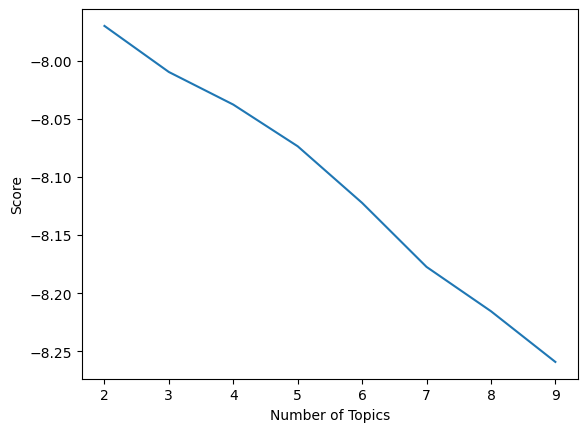

In [22]:
# coherence확인(군집평가)
from gensim.models import CoherenceModel

values = [] 
coherence_values = []

for i in range(2, 10):
    ldamodel = models.ldamodel.LdaModel(corpus,
                                        num_topics=i,
                                        id2word=dictionary)


    values.append(ldamodel.log_perplexity(corpus))
    
x = range(2,10) 
plt.plot(x, values) 
plt.xlabel('Number of Topics') 
plt.ylabel('Score')
plt.show()


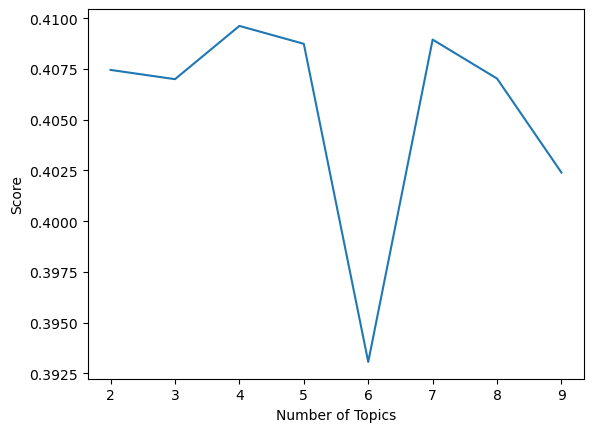

In [23]:
# coherence확인(군집평가)
from gensim.models import CoherenceModel

values = [] 
coherence_values = []

for i in range(2, 10):
    ldamodel = models.ldamodel.LdaModel(corpus,
                                        num_topics=i,
                                        id2word=dictionary)
    
    coherence_model_lda = CoherenceModel(model = ldamodel,
                                    texts = data1,
                                    dictionary = dictionary,
                                    topn = 10)
    
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

x = range(2,10) 
plt.plot(x, coherence_values) 
plt.xlabel('Number of Topics') 
plt.ylabel('Score')
plt.show()


ward clustering :  데이터의 수직적 구조를 파악할 수 있음

In [26]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [27]:
sp_matrix1 = vectorizer.fit_transform(data3)

In [28]:
df1 = pd.DataFrame(sp_matrix1.toarray(), columns = vectorizer.get_feature_names())

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
cluster = AgglomerativeClustering(n_clusters = 6,
                                  linkage = 'ward')
cluster

AgglomerativeClustering(n_clusters=6)

In [30]:
result = cluster.fit_predict(df1)
result

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 4, 0, 1, 0, 2, 1, 1, 0, 0, 4, 1, 1,
       0, 0, 0, 0, 1, 4, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 4, 5, 3, 0, 1, 1, 1, 4, 2, 1, 1, 1, 4, 1, 3, 1, 1, 1, 2, 4, 1,
       0, 1, 0, 1, 3, 1, 0, 0, 1, 4, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 0, 4, 1, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 4, 1, 0, 1, 0, 1, 0, 4, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 4, 4, 4, 1, 1, 0, 0, 1, 4,
       1, 4, 4, 4, 2, 3, 1, 1, 1, 0, 1, 1, 4, 1, 4, 1, 2, 1, 5, 1, 2, 4,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 4, 3, 1, 4, 3, 4, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 4, 1, 1, 1, 1, 0, 1, 1, 1, 4, 1, 1, 1, 4, 2, 1,
       1, 4, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 4, 4, 1, 1, 0, 1, 1, 2,
       1, 4, 0, 4, 1, 0, 0, 4, 5, 1, 0, 1, 0, 1, 1, 4, 4, 0, 4, 0, 0, 1,
       1, 4, 4, 1, 1, 1, 0, 1, 1, 0, 4, 1, 4, 2, 1, 1, 4, 1, 2, 0, 1, 2,
       1, 1, 4, 0, 4, 0, 4, 2, 2, 1, 1, 2, 1, 3, 1,

In [31]:
df_ward = data.copy()

In [32]:
df_ward['Cluster'] = list(result)
df_ward

,time,review,comment,like,url,doc,token,text_noun,Cluster
0,2022. 6. 9. 0:24,생활 나의 결혼식 답례품 후기 및 추천 : 꾸디 프리미엄 비건...,[],1,https://blog.naver.com/leeahn01/222765307737,생활 나의 결혼식 답례품 후기 및 추천 꾸디 프리미엄 비건 쿠키 디저트 이안 복사...,"[생활, 결혼식, 답례, 품, 후기, 추천, 꾸다, 프리미엄, 비건, 쿠키, 디저트...","[생활, 결혼식, 답례, 품, 후기, 추천, 프리미엄, 비건, 쿠키, 디저트, 이안...",0
1,2022. 2. 11. 23:53,일지 4일차_ 맛있으면 안되는데..? 키메랩 ・...,[],49,https://blog.naver.com/bella_hw/222645313869,일지 일차 맛있으면 안되는데 키메랩 복사 이웃추가 본문 기타 기능 공유하기 생각보...,"[일지, 일차, 맛있다, 안되다, 키메, 랩, 복사, 이웃, 추가, 본문, 기능, ...","[일지, 일차, 키메, 랩, 복사, 이웃, 추가, 본문, 기능, 공유, 생각, 비건...",1
2,2022. 2. 22. 0:44,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 ...,[],2,https://blog.naver.com/naughtypuppy22/22265413...,맛집멋집 교대역 한 끼 식사 비건푸드 스윗밸런스 나우티퍼피 복사 이웃추가 본문 기...,"[맛집, 멋지다, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, ...","[맛집, 교대역, 끼, 식사, 비건, 푸드, 스윗, 밸런스, 나우, 티, 퍼피, 복...",1
3,2022. 2. 14. 10:00,"맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식, ...",[],2,https://blog.naver.com/mom_say/222646546514,맘메이크선식 바쁜직장인들을 위한 추천 간편식사대용식 포만감과 비타민 가 풍부하여 ...,"[맘, 메이크, 선, 바쁘다, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민,...","[맘, 메이크, 선, 직장인, 추천, 간편식, 대용, 포만, 감, 비타민, 내면, ...",1
4,2021. 9. 20. 17:56,"﻿ 베지터블 토마토스튜 \8,500vegetable tomato stew (wit...",[],5,https://blog.naver.com/givingtreems/222511615680,베지터블 토마토스튜 새송이버섯 양파 주키니 당근 샐러리 등 다섯가지 채소를 올리브...,"[베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 새다, 리, 가지, 채소...","[베지터블, 토마토, 스튜, 송이버섯, 양파, 키, 당근, 리, 가지, 채소, 올리...",0
...,...,...,...,...,...,...,...,...,...
956,2022. 4. 4. 23:02,일상 다이어트 식단기록 76 / 77일차 O리...,[],10,https://blog.naver.com/sj330035/222691733289,일상 다이어트 식단기록 일차 리 복사 이웃추가 본문 기타 기능 공유하기 다이어트 ...,"[일상, 다이어트, 식단, 기록, 일차, 리, 복사, 이웃, 추가, 본문, 기능, ...","[일상, 다이어트, 식단, 기록, 일차, 리, 복사, 이웃, 추가, 본문, 기능, ...",1
957,2022. 4. 1. 11:39,업계 트랜드 분석 '22.4.1(금) F&B 뉴스 클리핑 ...,[],4,https://blog.naver.com/pulmuonefnc/222688754395,업계 트랜드 분석 금 뉴스 클리핑 푸드앤로그 복사 이웃추가 본문 기타 기능 공유하...,"[업계, 트, 랜드, 분석, 금, 뉴스, 크다, 리핑, 푸드, 앤, 로그, 복사, ...","[업계, 트, 랜드, 분석, 금, 뉴스, 리핑, 푸드, 앤, 로그, 복사, 이웃, ...",1
958,2022. 4. 26. 17:10,♧계란아 뭐하니?♧ 널담 병아리콩 스낵<비건 푸드> ...,[],19,https://blog.naver.com/aablack/222712249314,계란아 뭐하니 널담 병아리콩 스낵 비건 푸드 힘찬 가족 복사 이웃추가 본문 기타 ...,"[계란, 뭐, 널다, 병아리, 콩, 스낵, 비건, 푸드, 힘차다, 가족, 복사, 이...","[계란, 뭐, 병아리, 콩, 스낵, 비건, 푸드, 가족, 복사, 이웃, 추가, 본문...",1
959,2021. 3. 6. 17:05,카페 거제카페추천 : 프릴메이 : 아주동카페 : 비건빵집 ...,[],8,https://blog.naver.com/h_yuri931017/222266408609,카페 거제카페추천 프릴메이 아주동카페 비건빵집 율로그 복사 이웃추가 본문 기타 기...,"[카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...","[카페, 거제, 카페, 추천, 프릴, 메이, 아주동, 카페, 비건, 빵집, 율, 로...",0


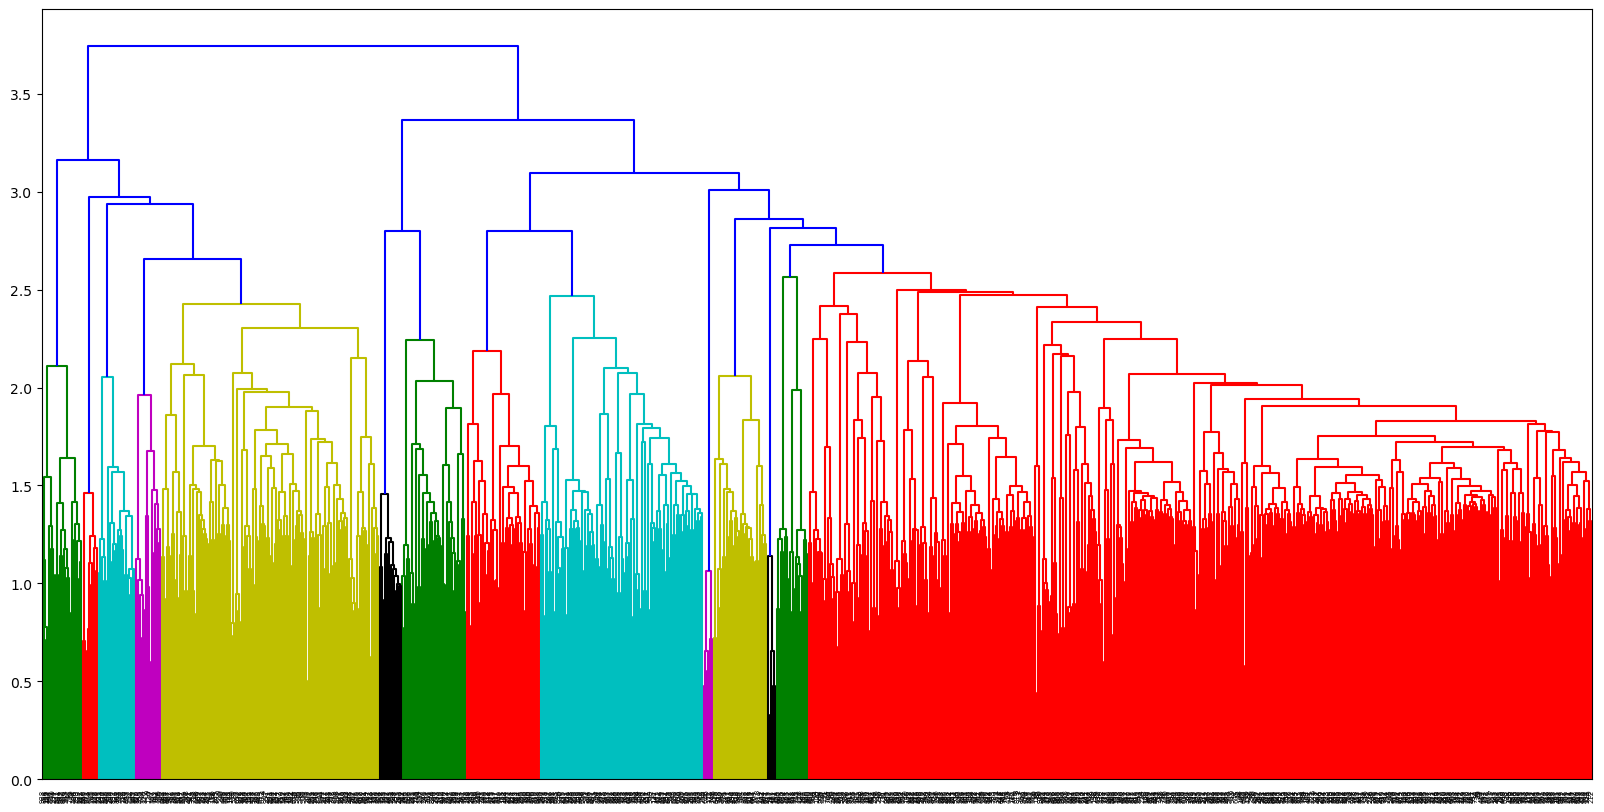

In [33]:
plt.figure(figsize=(20,10))
dendrogram = shc.dendrogram(shc.linkage(df1, method='ward'))


In [34]:
import pickle
df_ward.to_pickle('직장인탐구생활_clustering.pkl')

df_ward.to_csv('직장인탐구생활_clustering.csv', encoding = 'utf-8-sig')